In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, sys, tarfile

In [74]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=10, resize=0.9)

In [75]:
print(lfw_people.target.shape)
print(lfw_people.images.shape)

(4324,)
(4324, 112, 84)


In [76]:
same_faces = {}

for i, name in enumerate(lfw_people.target):
    if name not in same_faces.keys():
        same_faces[name] = []
    same_faces[name].append(np.expand_dims(lfw_people.images[i], -1))

print(same_faces.keys())

dict_keys([54, 0, 134, 23, 153, 56, 137, 157, 106, 17, 37, 28, 76, 11, 92, 3, 21, 6, 81, 57, 13, 36, 35, 156, 128, 117, 131, 125, 149, 91, 59, 86, 26, 34, 65, 85, 88, 77, 138, 124, 63, 152, 70, 95, 5, 46, 25, 127, 111, 102, 42, 61, 154, 4, 14, 119, 49, 47, 68, 139, 103, 100, 151, 72, 89, 19, 66, 110, 99, 93, 146, 39, 79, 38, 29, 33, 50, 73, 12, 145, 122, 123, 45, 147, 129, 60, 41, 43, 44, 52, 83, 109, 141, 144, 24, 48, 80, 126, 30, 121, 7, 97, 40, 27, 9, 84, 120, 78, 136, 1, 67, 71, 90, 96, 132, 10, 69, 15, 8, 143, 62, 2, 118, 130, 115, 94, 82, 116, 18, 112, 114, 58, 32, 142, 64, 75, 20, 98, 87, 148, 150, 51, 74, 105, 107, 55, 104, 140, 133, 113, 31, 108, 16, 101, 155, 53, 135, 22])


In [77]:
for key in same_faces.keys():
    if len(same_faces[key]) > 1:
        print(same_faces[key][0].shape)
# print(len(same_faces["David Beckham"]))

(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)
(112, 84, 1)

In [78]:
import math
import random

triplets = []

for key in same_faces.keys():
    images = np.array(same_faces[key])
    for i in range(int(math.ceil(len(images)/8))):
        triplet = []
        image_pair = np.random.choice(np.arange(len(images)), size = 2, replace=False)
        triplet.append(images[image_pair[0]])
        triplet.append(images[image_pair[1]])
        key_negative = random.choice(list(same_faces.keys()))
        if key_negative == key:
            key_negative = random.choice(list(same_faces.keys()))
        neg_img = random.choice(same_faces[key_negative])
        triplet.append(neg_img)
        triplet = np.array(triplet)
        triplets.append(triplet)

615


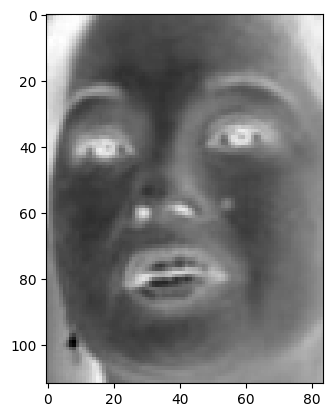

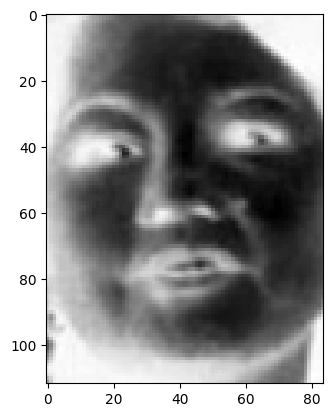

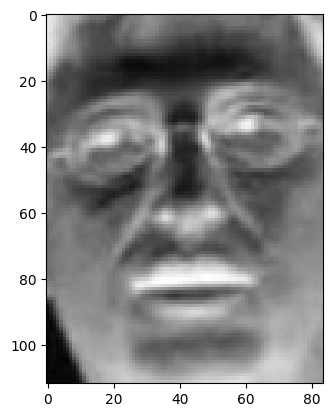

In [79]:
print(len(triplets))
for triplet in triplets[70]:
    plt.imshow(triplet, cmap=plt.cm.binary)
    plt.show()

In [80]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [81]:
triplets = np.array(triplets)
triplets = np.repeat(triplets, 3, axis = -1)
triplets.shape

(615, 3, 112, 84, 3)

In [83]:
trained_base_model = InceptionV3(input_shape=(112, 84, 3), include_top=False, weights="imagenet")
for layer in trained_base_model.layers:
    layer.trainable = False
trained_base_model.summary()

87910968/87910968 [==============================] - 6s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 112, 84, 3)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 55, 41, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 55, 41, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

In [94]:
base_model = trained_base_model.get_layer("mixed7")
base_model_output = base_model.output

In [95]:
import tensorflow.keras.layers as tfl
embedding_top = tfl.Flatten()(base_model_output)
embedding_top = tfl.Dense(512, activation="relu")(embedding_top)
embedding_top = tfl.Dropout(0.2)(embedding_top)
embedding_top = tfl.Dense(32, activation="relu")(embedding_top)

In [100]:
from keras import Model

base_embedding_model = tf.keras.Model(trained_base_model.input, embedding_top)

In [149]:
anchor_input = tfl.Input(shape=(112, 84, 3))
positive_input = tfl.Input(shape=(112, 84, 3))
negative_input = tfl.Input(shape=(112, 84, 3))

anchor_embedding = base_embedding_model(anchor_input)
positive_embedding = base_embedding_model(positive_input)
negative_embedding = base_embedding_model(negative_input)

In [152]:
class DistanceLayer(tfl.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    def call(self, anchor, positive, negative):
        ap_dist = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_dist = tf.reduce_sum(tf.square(anchor - negative), -1)
        return ap_dist, an_dist

In [160]:
distances = DistanceLayer()(anchor_embedding, positive_embedding, negative_embedding)
siamese_network = Model([anchor_input, positive_input, negative_input], distances)

In [161]:
class SiameseModel(Model):
    def __init__(self, siamese_network, margin=0.2):
        super().__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def _compute_loss(self, data):
        ap_dist, an_dist = self.siamese_network(data)
        return tf.maximum((ap_dist - an_dist + self.margin), 0.0)

    def train_step(self, data):
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.siamese_network.trainable_weights))
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    @property
    def metrics(self):
        return self.loss_tracker


In [163]:
anchors_dataset = tf.data.Dataset.from_tensor_slices(triplets[:, 0])
positive_dataset = tf.data.Dataset.from_tensor_slices(triplets[:, 1])
negative_dataset = tf.data.Dataset.from_tensor_slices(triplets[:, 2])

dataset = tf.data.Dataset.zip((anchors_dataset, positive_dataset, negative_dataset))
dataset = dataset.shuffle(buffer_size=200)
dataset_fin = dataset.batch(20, drop_remainder=False)
dataset_fin = dataset_fin.prefetch(5)

In [165]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001))
siamese_model.fit(dataset_fin, epochs=10)

TypeError: 'Mean' object is not iterable

In [140]:
from tensorflow.keras import backend as K

def triplet_loss(inputs):
    anchor, positive, negative = inputs
    # pos_dist = K.sum(K.square((anchor - positive_embedding)), axis=-1)
    return K.maximum(K.sum((anchor-positive)**2) - K.sum((anchor-negative)**2) + 0.2, 0.0)
    # neg_dist = backend.sum(backend.square(anchor - negative), axis=-1)
    # return  backend.maximum(pos_dist - neg_dist + 0.2, 0.0)

In [154]:
from keras.layers import Lambda

triplet_loss_layer = Lambda(triplet_loss)([anchor_embedding, positive_embedding, negative_embedding])
triplet_loss_model = Model([anchor_input, positive_input, negative_input], triplet_loss_layer)

triplet_loss_model.compile(optimizer="adam", loss=lambda y_true, y_pred: y_pred)

In [155]:
base_embedding_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 112, 84, 3)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 55, 41, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 55, 41, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 55, 41, 32)           0         ['batch_normalization[0]

In [156]:
triplet_loss_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_56 (InputLayer)       [(None, 112, 84, 3)]         0         []                            
                                                                                                  
 input_57 (InputLayer)       [(None, 112, 84, 3)]         0         []                            
                                                                                                  
 input_58 (InputLayer)       [(None, 112, 84, 3)]         0         []                            
                                                                                                  
 model_2 (Functional)        (None, 32)                   1489043   ['input_56[0][0]',            
                                                          2          'input_57[0][0]',     

In [144]:
triplets[:, 0].shape

(615, 112, 84, 3)

In [159]:
triplet_loss_model.fit([triplets[:, 0]/255, triplets[:, 1]/255, triplets[:, 2]/255], np.zeros(len(triplets)), epochs = 5)

Epoch 1/5
20/20 [==============================] - 7s 327ms/step - loss: 544.3993
Epoch 2/5
20/20 [==============================] - 7s 341ms/step - loss: 4404.8652
Epoch 3/5
20/20 [==============================] - 6s 321ms/step - loss: 4113.8970
Epoch 4/5
20/20 [==============================] - 7s 331ms/step - loss: 2628.4800
Epoch 5/5
20/20 [==============================] - 6s 314ms/step - loss: 2014.5195
